# **FAKE NEWS CLASSIFICATION NOTEBOOK**

In [73]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## **Loading and Exploring the dataset**

In [74]:
df = pd.read_csv("WELFake_Dataset.csv")

In [75]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [76]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  72134 non-null  int64
 1   title       71576 non-null  str  
 2   text        72095 non-null  str  
 3   label       72134 non-null  int64
dtypes: int64(2), str(2)
memory usage: 2.2 MB


In [77]:
df.shape

(72134, 4)

In [78]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


## **Data Cleaning**

In [81]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='str')

In [82]:
df.drop(columns=['Unnamed: 0'],  inplace=True)

In [83]:
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

### Text cleaning

In [85]:
df["content"] = df["title"].fillna('') + " " + df["text"].fillna('')


In [86]:
df.drop_duplicates(subset="content", inplace=True)


In [87]:
df = df[df["content"].str.split().str.len() > 20]


In [88]:
import pandas as pd
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tokenizer, stopwords, and lemmatizer
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')  # Selects words with 3+ letters
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""

    #  Convert to lowercase FIRST
    text = str(text).lower().strip()

    #  Remove punctuation & special characters
    text = re.sub(r'[^\w\s]', '', text)  # Keeps only letters & spaces

    # Tokenize words (3+ letters)
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    #  Lemmatize words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    #  Reconstruct sentence
    return " ".join(lemmatized_tokens)

# Apply preprocessing
df['content_text'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
df['content_text'].head()

0    law enforcement high alert following threat co...
2    unbelievable obamas attorney general say charl...
3    bobby jindal raised hindu us story christian c...
4    satan russia unvelis image terrifying new supe...
5    time christian group sue amazon splc designati...
Name: content_text, dtype: str

## **Exploratory Data Analysis (EDA)**

In [92]:
from collections import Counter
from wordcloud import WordCloud

label
0    34749
1    27637
Name: count, dtype: int64


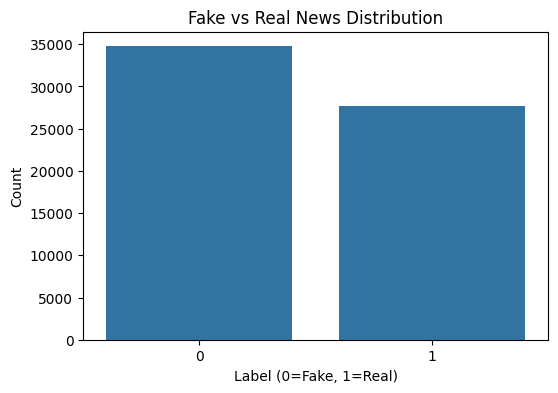

In [96]:
# Check class distribution
label_counts = df['label'].value_counts()
print(label_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Fake vs Real News Distribution')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Count')
plt.show()


count    62386.000000
mean       316.000593
std        332.385623
min          7.000000
25%        149.000000
50%        239.000000
75%        392.000000
max      16357.000000
Name: word_count, dtype: float64


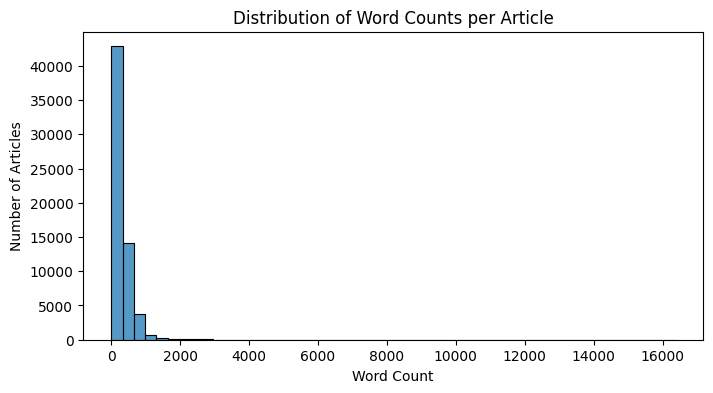

In [94]:
# Add a column for word count
df['word_count'] = df['content_text'].apply(lambda x: len(x.split()))

# Statistics
print(df['word_count'].describe())

# Plot distribution
plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=50)
plt.title('Distribution of Word Counts per Article')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()


Top 20 Most Common Words: [('said', 218904), ('trump', 207492), ('state', 101648), ('would', 95765), ('people', 80593), ('president', 80095), ('one', 79194), ('new', 72098), ('year', 67918), ('clinton', 66067), ('time', 65131), ('republican', 58940), ('also', 58080), ('like', 50759), ('say', 48649), ('government', 46899), ('american', 46453), ('could', 45657), ('house', 43670), ('country', 43406)]


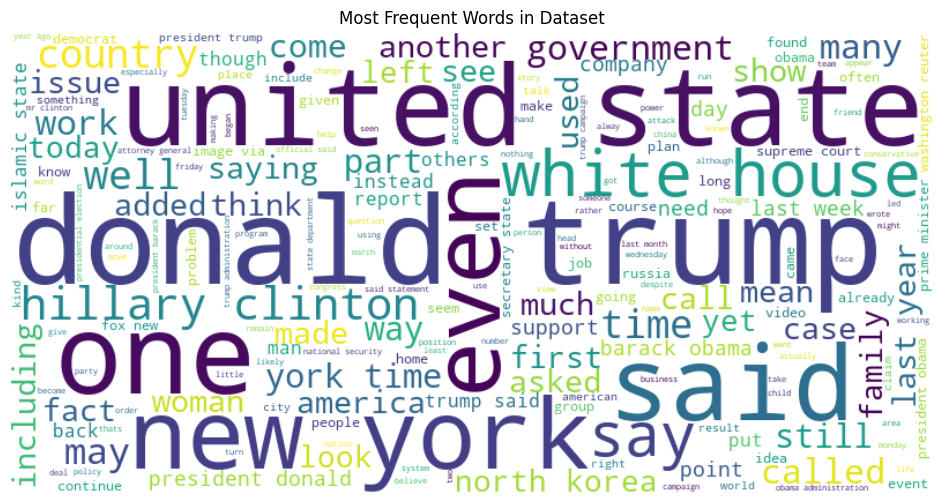

In [95]:
# Combine all text
all_words = ' '.join(df['content_text']).split()

# Count frequency
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print("Top 20 Most Common Words:", most_common_words)

# Optional WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Dataset")
plt.show()


Top 20 Words in Fake News: [('said', 183338), ('trump', 114297), ('state', 69615), ('would', 62229), ('president', 51125), ('new', 49856), ('year', 45755), ('one', 43444), ('people', 41897), ('republican', 40051), ('time', 38577), ('also', 36400), ('government', 31519), ('house', 30980), ('clinton', 30120), ('could', 29911), ('say', 28737), ('reuters', 28500), ('united', 27557), ('country', 27312)]


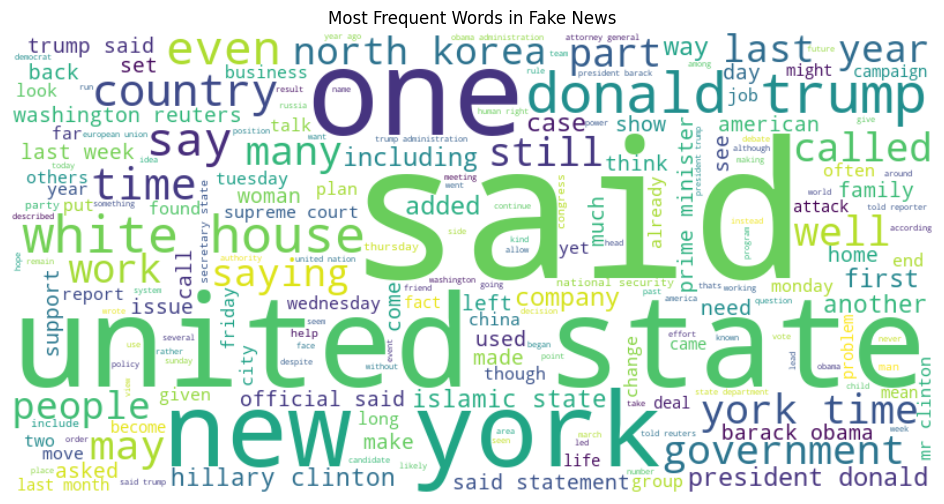

In [97]:
fake_text = ' '.join(df[df['label']==0]['content_text']).split()
fake_word_freq = Counter(fake_text)
most_common_fake = fake_word_freq.most_common(20)
print("Top 20 Words in Fake News:", most_common_fake)

# WordCloud for Fake
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_text))
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Fake News")
plt.show()


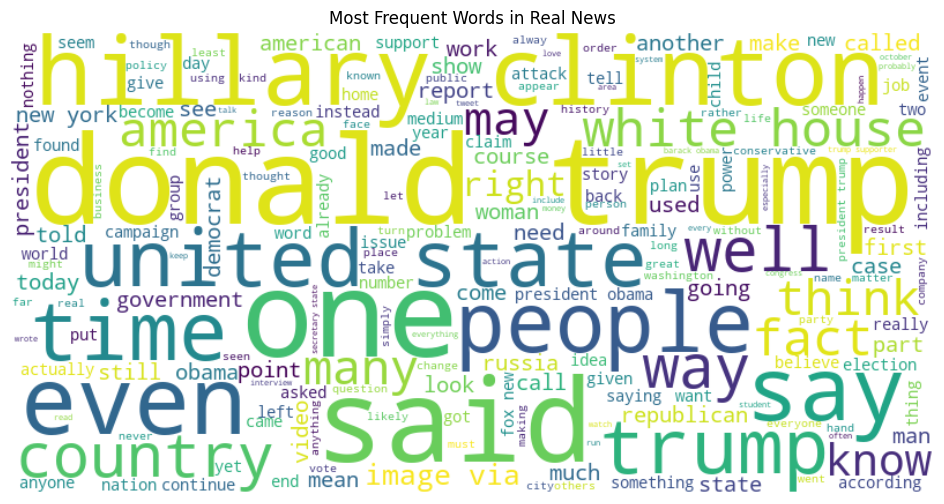

In [98]:
real_text = ' '.join(df[df['label']==1]['content_text']).split()
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_text))
plt.figure(figsize=(15,6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Real News")
plt.show()


In [100]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Fake news words (label 0)
fake_text = ' '.join(df[df['label']==0]['content_text']).split()
fake_word_freq = Counter(fake_text)
top_fake = fake_word_freq.most_common(10)
fake_words, fake_counts = zip(*top_fake)

# Top 10 Real news words (label 1)
real_text = ' '.join(df[df['label']==1]['content_text']).split()
real_word_freq = Counter(real_text)
top_real = real_word_freq.most_common(10)
real_words, real_counts = zip(*top_real)


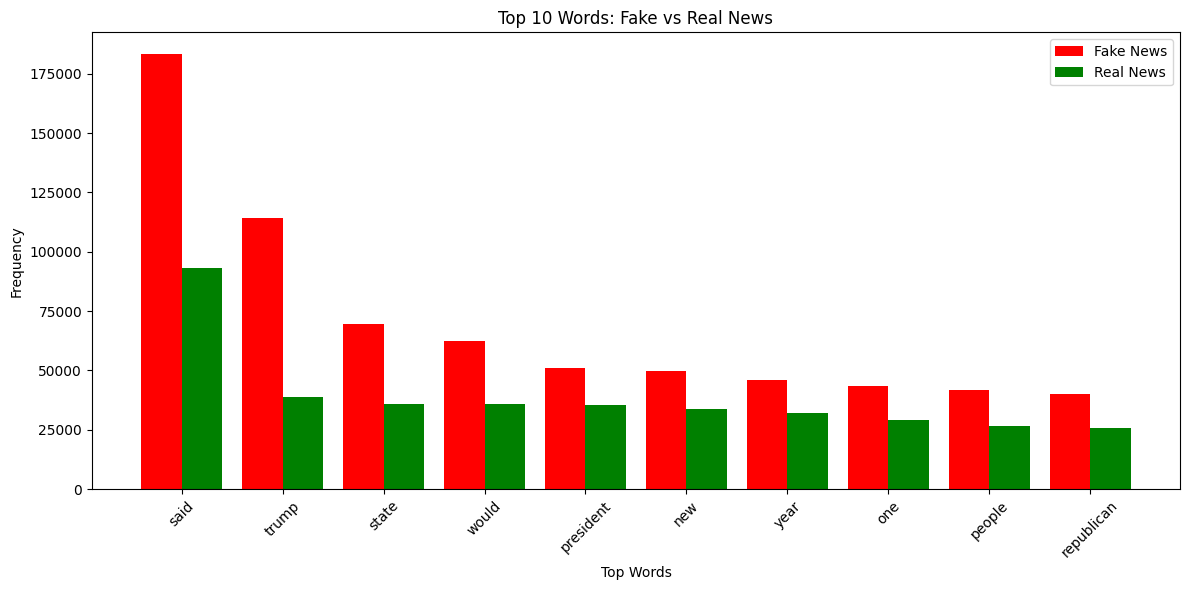

In [101]:
import numpy as np

plt.figure(figsize=(12,6))

# Set positions
x_fake = np.arange(len(fake_words))
x_real = np.arange(len(real_words)) + 0.4  # offset for side-by-side

# Bars
plt.bar(x_fake, fake_counts, width=0.4, label='Fake News', color='red')
plt.bar(x_real, real_counts, width=0.4, label='Real News', color='green')

# Labels
plt.xticks(np.arange(10)+0.2, fake_words, rotation=45)
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words: Fake vs Real News')
plt.legend()
plt.tight_layout()
plt.show()


label
0    333.540332
1    293.947245
Name: word_count, dtype: float64


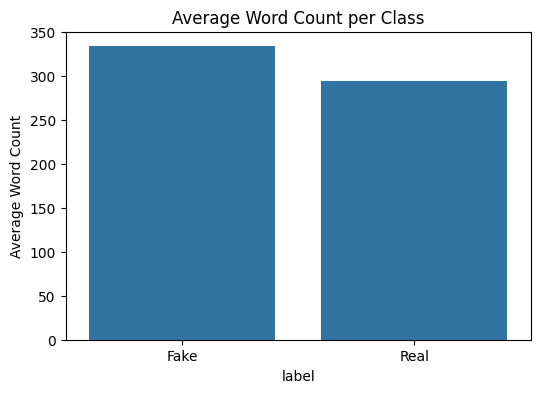

In [99]:
avg_word_count = df.groupby('label')['word_count'].mean()
print(avg_word_count)

# Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x=avg_word_count.index, y=avg_word_count.values)
plt.xticks([0,1], ['Fake', 'Real'])
plt.title('Average Word Count per Class')
plt.ylabel('Average Word Count')
plt.show()


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and labels
X = df['content_text']
y = df['label']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize and train
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Metrics
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"Naive Bayes F1-score: {f1_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8541
Naive Bayes F1-score: 0.8405

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      6950
           1       0.81      0.87      0.84      5528

    accuracy                           0.85     12478
   macro avg       0.85      0.86      0.85     12478
weighted avg       0.86      0.85      0.85     12478



In [104]:
from sklearn.svm import LinearSVC

# Initialize and train
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"SVM F1-score: {f1_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9606
SVM F1-score: 0.9555

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6950
           1       0.96      0.96      0.96      5528

    accuracy                           0.96     12478
   macro avg       0.96      0.96      0.96     12478
weighted avg       0.96      0.96      0.96     12478



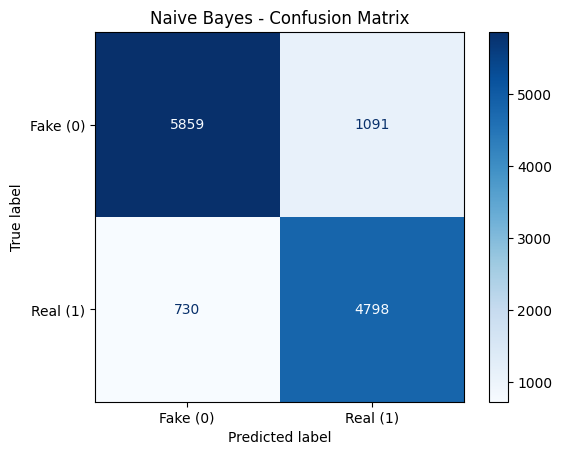

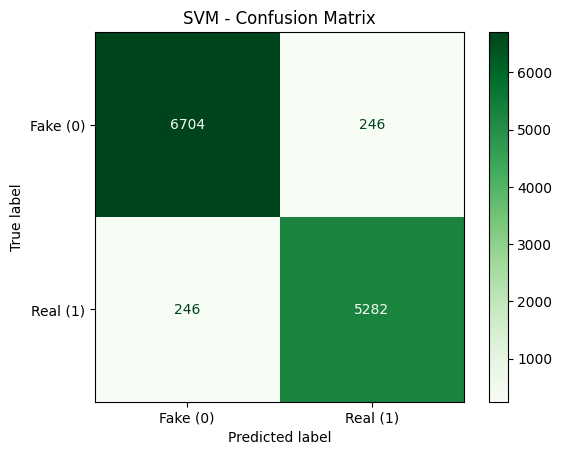

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=[0,1])
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=['Fake (0)', 'Real (1)'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[0,1])
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['Fake (0)', 'Real (1)'])
disp_svm.plot(cmap=plt.cm.Greens)
plt.title("SVM - Confusion Matrix")
plt.show()


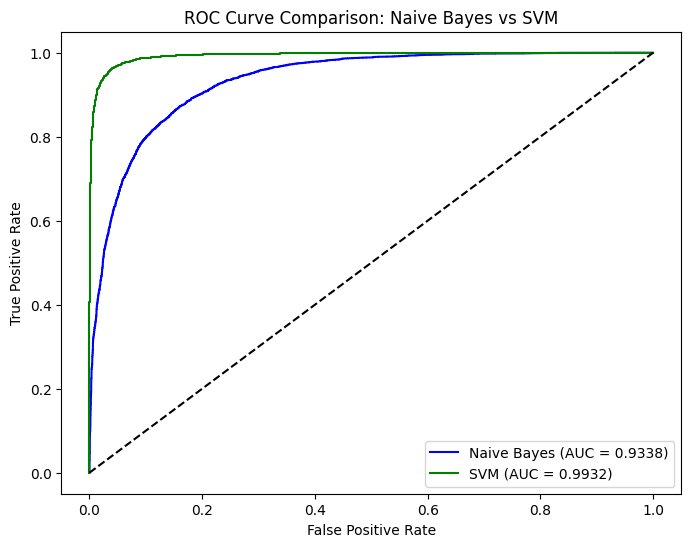

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Naive Bayes probabilities
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label=1)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# SVM decision function
y_scores_svm = svm_model.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm, pos_label=1)
roc_auc_svm = roc_auc_score(y_test, y_scores_svm)

# Plot both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})', color='green')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Naive Bayes vs SVM')
plt.legend()
plt.show()


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 5000]
}

# Initialize LinearSVC
svc = LinearSVC(random_state=42)

# Grid search with 5-fold cross-validation
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}
Best CV F1-score: 0.9563215401009891


In [108]:
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, f1_score, classification_report

acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print(f"Fine-tuned SVM Accuracy: {acc_best:.4f}")
print(f"Fine-tuned SVM F1-score: {f1_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fine-tuned SVM Accuracy: 0.9606
Fine-tuned SVM F1-score: 0.9555

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6950
           1       0.96      0.96      0.96      5528

    accuracy                           0.96     12478
   macro avg       0.96      0.96      0.96     12478
weighted avg       0.96      0.96      0.96     12478



In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 20000   # Vocabulary size
MAX_LEN = 300       # Max words per news article

# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

EMBED_DIM = 128  # Size of word embeddings

model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Users\PC\OneDrive\Desktop\Data Science\PERSONAL PROJECTS\Fake-News-Classification-with-NLP\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [111]:
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=64
)


Epoch 1/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 384s 490ms/step - accuracy: 0.6585 - loss: 0.6033 - val_accuracy: 0.5766 - val_loss: 0.6520
Epoch 2/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 337s 480ms/step - accuracy: 0.7336 - loss: 0.5189 - val_accuracy: 0.8401 - val_loss: 0.4420
Epoch 3/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 376s 471ms/step - accuracy: 0.7064 - loss: 0.5446 - val_accuracy: 0.8676 - val_loss: 0.3651
Epoch 4/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 338s 481ms/step - accuracy: 0.8882 - loss: 0.3085 - val_accuracy: 0.8964 - val_loss: 0.2579
Epoch 5/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 379s 477ms/step - accuracy: 0.9371 - loss: 0.1886 - val_accuracy: 0.8884 - val_loss: 0.2727


In [112]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predict class labels
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

acc_lstm = accuracy_score(y_test, y_pred)
f1_lstm = f1_score(y_test, y_pred)

print(f"LSTM Accuracy: {acc_lstm:.4f}")
print(f"LSTM F1-score: {f1_lstm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


390/390 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step
LSTM Accuracy: 0.8824
LSTM F1-score: 0.8785

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      6950
           1       0.81      0.96      0.88      5528

    accuracy                           0.88     12478
   macro avg       0.89      0.89      0.88     12478
weighted avg       0.90      0.88      0.88     12478



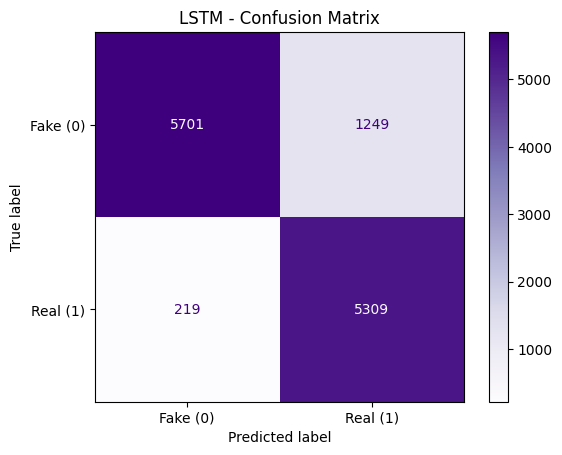

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred, labels=[0,1])

# Display
disp_lstm = ConfusionMatrixDisplay(cm_lstm, display_labels=['Fake (0)', 'Real (1)'])
disp_lstm.plot(cmap=plt.cm.Purples)
plt.title("LSTM - Confusion Matrix")
plt.show()


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

EMBED_DIM = 128  # Word embedding dimension
LSTM_UNITS = 64  # Units for LSTM

model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBED_DIM, input_length=MAX_LEN))
model_bilstm.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(1, activation='sigmoid'))  # Binary classification

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()


c:\Users\PC\OneDrive\Desktop\Data Science\PERSONAL PROJECTS\Fake-News-Classification-with-NLP\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
history_bilstm = model_bilstm.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=64
)


Epoch 1/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 635s 889ms/step - accuracy: 0.9384 - loss: 0.1578 - val_accuracy: 0.9615 - val_loss: 0.0985
Epoch 2/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 685s 894ms/step - accuracy: 0.9784 - loss: 0.0630 - val_accuracy: 0.9613 - val_loss: 0.1135
Epoch 3/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 941s 1s/step - accuracy: 0.9893 - loss: 0.0322 - val_accuracy: 0.9651 - val_loss: 0.1242
Epoch 4/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 706s 930ms/step - accuracy: 0.9960 - loss: 0.0141 - val_accuracy: 0.9617 - val_loss: 0.1372
Epoch 5/5
702/702 ━━━━━━━━━━━━━━━━━━━━ 691s 943ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.9617 - val_loss: 0.1585


In [116]:
# Predict probabilities
y_pred_prob_bilstm = model_bilstm.predict(X_test_pad)

# Convert to class labels
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score, classification_report

acc_bilstm = accuracy_score(y_test, y_pred_bilstm)
f1_bilstm = f1_score(y_test, y_pred_bilstm)

print(f"BiLSTM Accuracy: {acc_bilstm:.4f}")
print(f"BiLSTM F1-score: {f1_bilstm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bilstm))


390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 169ms/step
BiLSTM Accuracy: 0.9535
BiLSTM F1-score: 0.9476

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6950
           1       0.95      0.95      0.95      5528

    accuracy                           0.95     12478
   macro avg       0.95      0.95      0.95     12478
weighted avg       0.95      0.95      0.95     12478



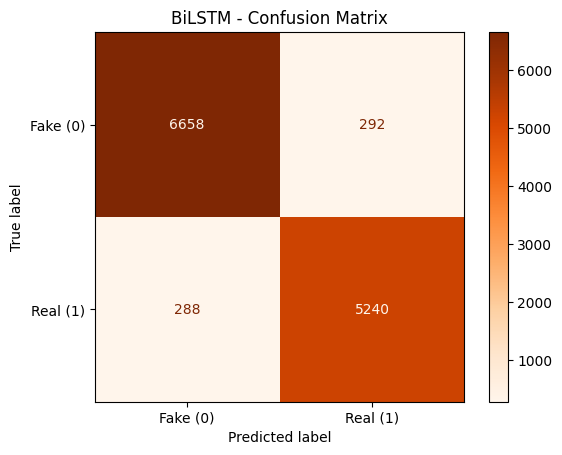

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm, labels=[0,1])

# Plot confusion matrix
disp_bilstm = ConfusionMatrixDisplay(
    confusion_matrix=cm_bilstm,
    display_labels=['Fake (0)', 'Real (1)']
)

disp_bilstm.plot(cmap=plt.cm.Oranges)
plt.title("BiLSTM - Confusion Matrix")
plt.show()
